Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [41]:
library(tidymodels)
library(ggplot2)
library(broom)


The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 3, 8, 1, 13, 5, 5, 3, 6, 10, 11, …
$ Glucose                  <dbl> 85, 89, 116, 110, 126, 99, 97, 145, 117, 109,…
$ BloodPressure            <dbl> 66, 66, 74, 92, 88, 84, 66, 82, 92, 75, 58, 9…
$ SkinThickness            <dbl> 29, 23, 0, 0, 41, 0, 15, 19, 0, 26, 11, 0, 31…
$ Insulin                  <dbl> 0, 94, 0, 0, 235, 0, 140, 110, 0, 0, 54, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 39.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.704, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 30, 30, 27, 50, 22, 57, 38, 60, 22, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The "outcome" variable is suitable for our the outcome for our logistic regression model.


In [11]:
head(diabetes$Outcome, 100)

[1] 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 [38] 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 [75] 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
Levels: 0 1

The 0 indicates that the patient does not have diabetes.
The 1 indicates that the patient has diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description                                                             |
| :---------- | :-----------------------------------------------------------------------|
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         | Body mass index (weight in kg/(height in m)^2)                          |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

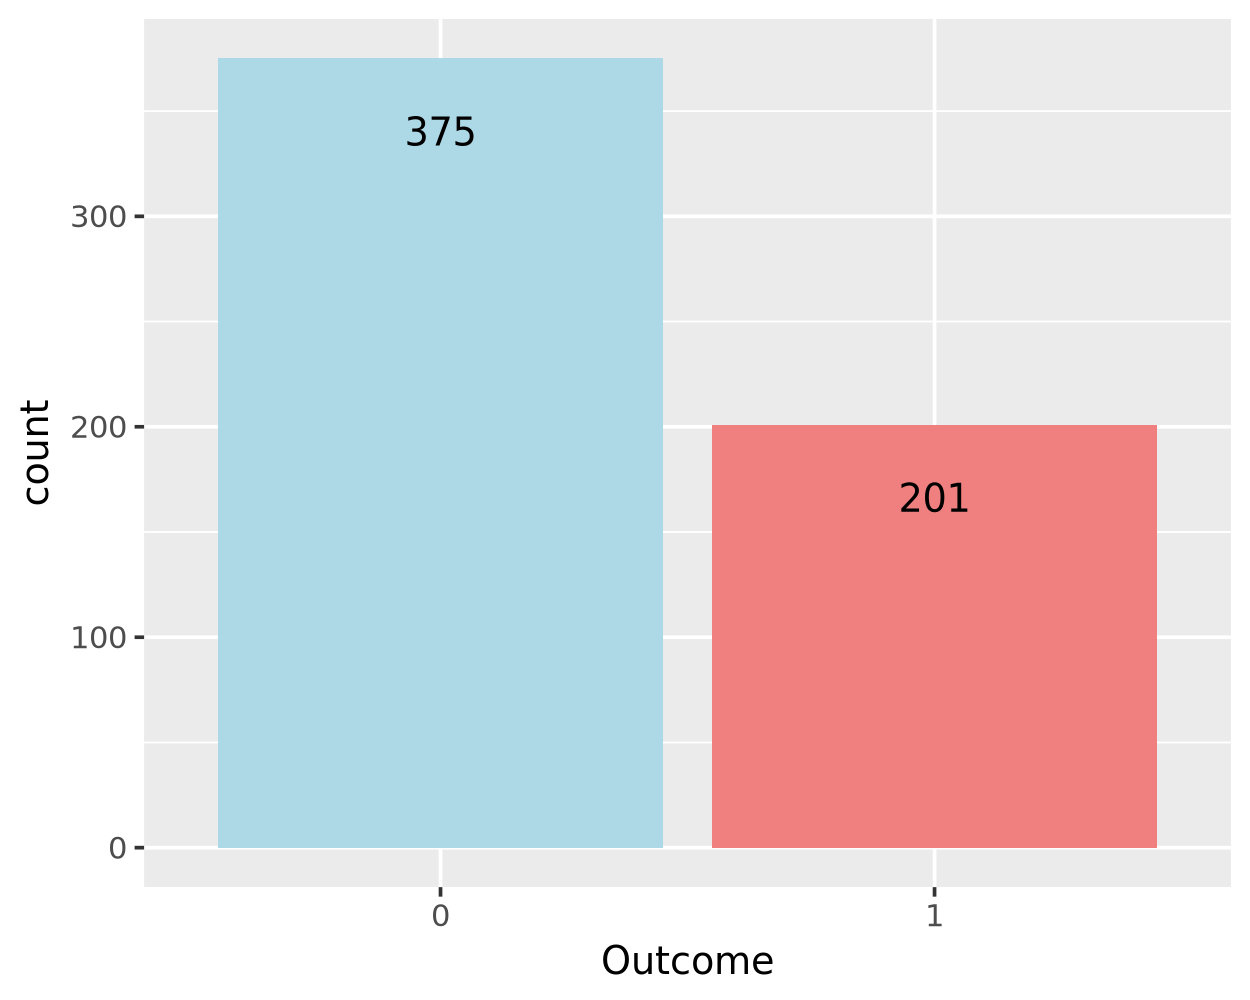

In [21]:
ggplot(diabetes_train, aes(x = Outcome)) +
    geom_bar(fill = c("lightblue", "lightcoral")) +
    geom_text(aes(label = ..count..), stat = "count", vjust = 3)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced. There are almost twice as many '0' values as '1' values.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [23]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

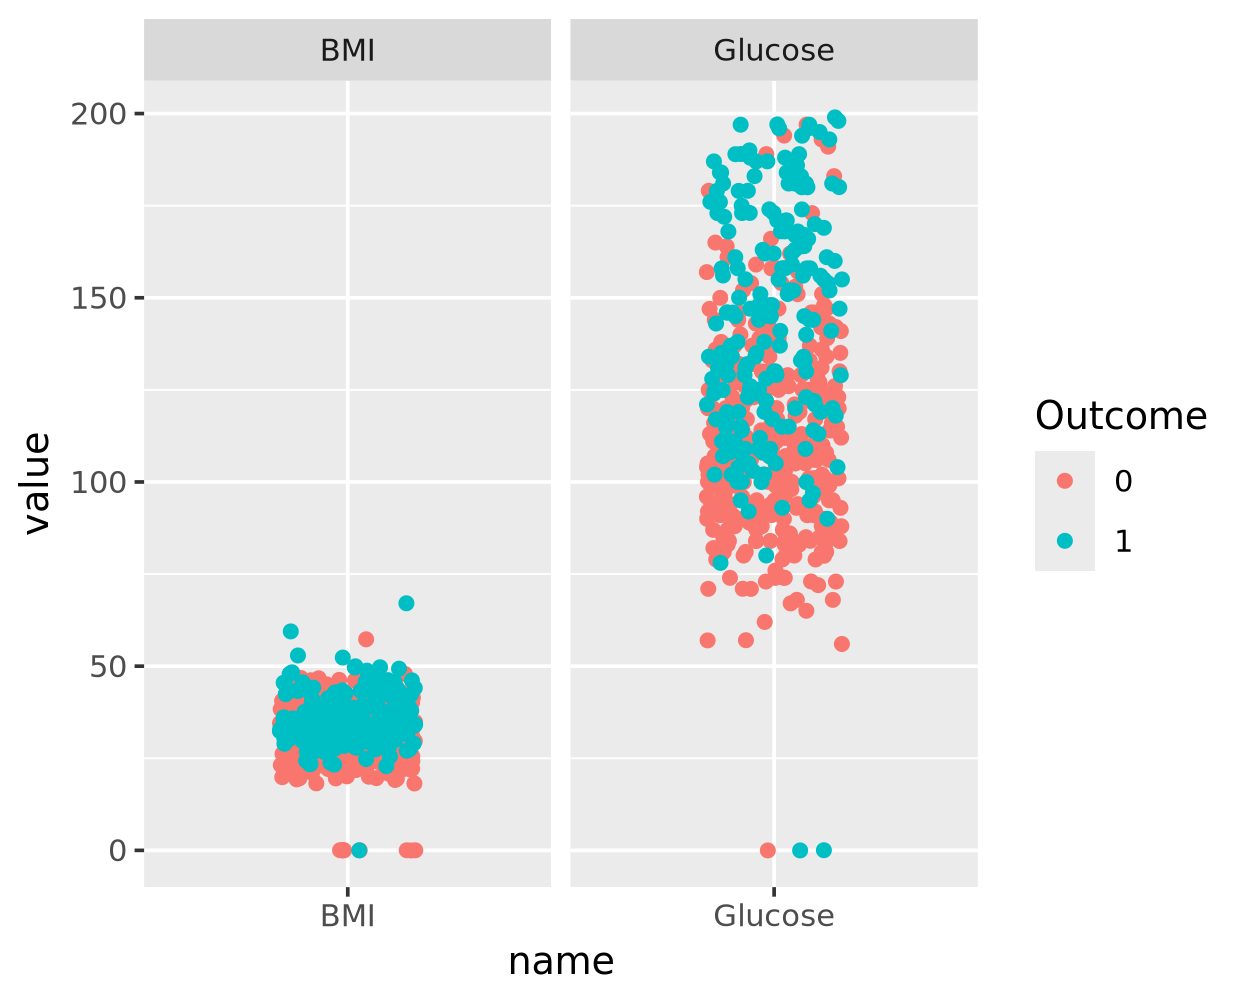

In [31]:
ggplot(plot_df, aes(x = name, y = value, color = Outcome)) +
    geom_jitter(width = 0.2) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Without the scales = 'free_x' argument it plots two different x-axis with each containing both `BMI` and `Glucose`. The first only shows data from `BMI` and the second only shows data from `Glucose`. With the argument we can see both side by side on one axis.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [38]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train) |> 
    step_naomit(everything()) 

rec_prepped  = prep(rec, diabetes_train) 

rec_prepped |> 
    juice() |>
    head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
28.1,89,0
25.6,116,0
37.6,110,0
39.3,126,0
35.4,99,0


In [39]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))

tidy(mod_fit)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.87419986,0.710895803,-11.076447,1.632214e-28
BMI,0.08275029,0.015526925,5.329471,9.849943e-08
Glucose,0.03595940,0.003802813,9.455998,3.199543e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [47]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)
head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.6937657,0.3062343,10,115,0,0,0,35.3,0.134,29,0
0,0.6532398,0.3467602,10,139,80,0,0,27.1,1.441,57,0
1,0.4427478,0.5572522,5,166,72,19,175,25.8,0.587,51,1
0,0.8287985,0.1712015,7,107,74,0,0,29.6,0.254,31,1
0,0.6427441,0.3572559,1,103,30,38,83,43.3,0.183,33,0
1,0.4263755,0.5736245,11,143,94,33,146,36.6,0.254,51,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [48]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  41
         1  16  26

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

The number of individuals with diabetes would be the sum of false negatives (41) and the true positives (26) so 41 + 26 = 67 individuals had diabetes.
Of those 67 only 26 were predicted to have diabetes.
There were 16 individuals predicted to have diabetes that did not have diabetes.